# Training del Modelo para Clasificar digitos decimales
En primer lugar, vamos a instalar la librería  tensorflow que usaremos de aquí en adelante.


In [ ]:
!pip install tensorflow

## Carga del dataset recolectado en la página de _Recolección de Datos_

In [ ]:
!gdown 1T4nydNtGK4wjKkWVpjdknXphX6c_Oqy7
!gdown 1evGAwnHbaKtkxFEfCF9VpCWyCQ9MRBN1

Downloading...
From: https://drive.google.com/uc?id=1T4nydNtGK4wjKkWVpjdknXphX6c_Oqy7
To: /content/X.npy
100% 4.52M/4.52M [00:00<00:00, 87.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1evGAwnHbaKtkxFEfCF9VpCWyCQ9MRBN1
To: /content/Y.npy
100% 580/580 [00:00<00:00, 1.74MB/s]




## Entrenamiento de nuestra Red Neuronal Convolucional



In [ ]:
import tensorflow as tf # pyp install tensorflow
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Despues de cargar los datos, vamos a dividir en conjuntos de datos de entrenamiento y de testeo

In [ ]:
## Desempaquetando el conjunto de datos en conjuntos de datos de entrenamiento y de testeo
x = np.load('X.npy')
Y = np.load('Y.npy')
x.shape

(113, 200, 200)

In [ ]:
x.shape # Comprobamos las dimensionses
size = (28, 28)
X = np.empty((x.shape[0], size[0], size[1]))

for i in range(x.shape[0]):
    X[i] = resize(x[i], size)
X.shape

(113, 28, 28)

## **One-hot encoding** de los resultados (En lugar de tener como resultado una sola neurona, tendre 10 donde solo el resultado correcto sera 1 y el resto 0)


In [ ]:
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y)

In [ ]:
print(Y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


## Visualizamos el primer dato de nuestro dataset

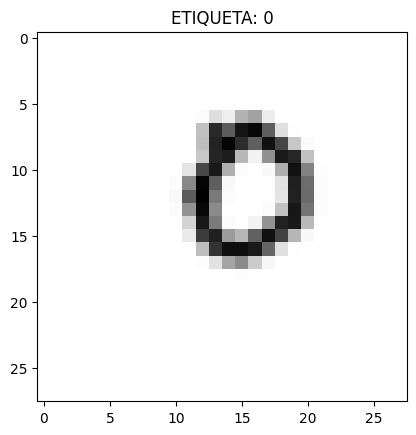

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # pyp install matplotlib
plt.imshow(X[1] , cmap = plt.cm.binary) #si queremos visualizarlo en escala de grises
# Mostramos tambien su etiqueta y comprobamos que esta etiquetado correctamente
etiq = "ETIQUETA: " + str(np.argmax(Y[1]))# Imprimo el numero donde la columna es 1
plt.title(etiq)
plt.show() ## Para mostrar el grafico

In [ ]:
print (X[0]) # Antes de la normalizacion

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.03958116e-08 1.32341589e-06 3.15185772e-06
  1.60842576e-06 3.67793688e-08 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.79741429e-08 2.07103250e-05
  7.33413730e-04 5.12144502e-03 2.40713827e-02 3.66397794e-02
  2.66478875e-02 8.48360882e-03 1.87131549e-03 6.53533273e-05
  1.26332398e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

## Normalizando los datos | Paso de Pre-Procesamiento

In [ ]:
## Se puede notar que la imagen gris y todos los valores varían de 0 a 255
X = X.astype('float32') / 255

In [ ]:
print (X[0]) ## Se puede ver que todos los valores ahora estan normalizados

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 7.99835753e-11 5.18986631e-09 1.23602266e-08
  6.30755226e-09 1.44232820e-10 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.04868386e-11 8.12169603e-08
  2.87613238e-06 2.00840968e-05 9.43975756e-05 1.43685407e-04
  1.04501523e-04 3.32690543e-05 7.33849220e-06 2.56287564e-07
  4.95421149e-10 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

## Redimensionamiento de la imagen para hacerla apta y aplicar la operación de Convolución

In [ ]:
import numpy as np # pyp install numpy
X = np.array(X)
X.shape

(113, 28, 28)

In [ ]:
TAM_IMG = 28
X = np.array(X).reshape(-1, TAM_IMG, TAM_IMG, 1) # Incrementando 1 dimension para las operaciones kernel(Filtro)
print("Dimension de las muestras: ", X.shape)

Dimension de las muestras:  (113, 28, 28, 1)


## Mostramos algunas imagenes del set de imagenes

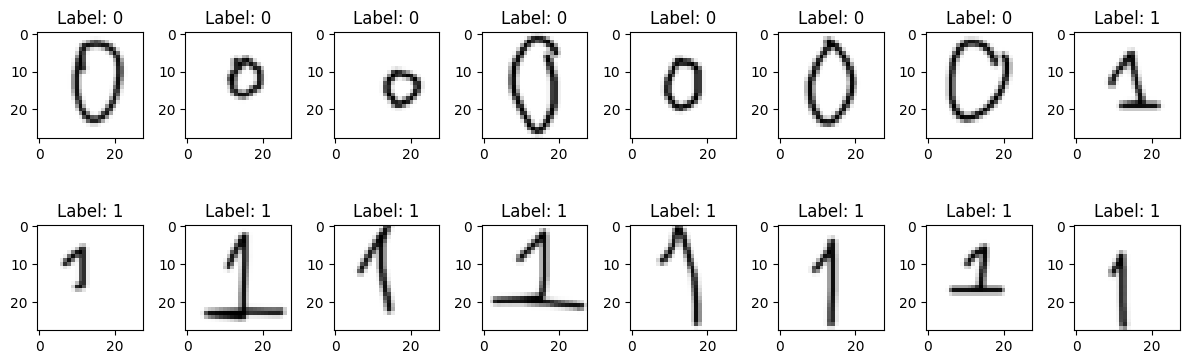

In [ ]:
filas = 2
columnas = 8
num = filas * columnas
imagenes = X[0:num]
etiquetas = Y[0:num]
fig, axes = plt.subplots(filas, columnas, figsize = (1.5 * columnas, 2 * filas))
for i in range(num):
     ax = axes[i // columnas, i % columnas]
     ax.imshow(imagenes[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(etiquetas[i])))
plt.tight_layout()
plt.show()

## Creando una Red Neuronal Profunda (Deep Neural Network)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=17, stratify=Y)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
### Creando una nueva red neuronal
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compilación
modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Vemos las caracteristias de nuestra Red Neuronal Convolucional

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

## Entrenamos nuestro modelo con 20 etapas de procesamiento

In [ ]:
TAMANO_LOTE = 10
print("Entrenando modelo...");
etapas = 120
history = modelo.fit(
    x_train, y_train,
    epochs = etapas,
    batch_size=TAMANO_LOTE,
    validation_data=(x_test, y_test),
    # steps_per_epoch=int(np.ceil(113 / float(TAMANO_LOTE))),
    # validation_steps=int(np.ceil(13 / float(TAMANO_LOTE)))
)

print("Modelo entrenado!");

Entrenando modelo...
Epoch 1/120
9/9 [==============================] - 2s 50ms/step - loss: 2.3027 - accuracy: 0.0889 - val_loss: 2.2989 - val_accuracy: 0.1739
Epoch 2/120
9/9 [==============================] - 0s 19ms/step - loss: 2.2987 - accuracy: 0.1000 - val_loss: 2.2926 - val_accuracy: 0.1739
Epoch 3/120
9/9 [==============================] - 0s 16ms/step - loss: 2.2916 - accuracy: 0.1556 - val_loss: 2.2805 - val_accuracy: 0.1739
Epoch 4/120
9/9 [==============================] - 0s 17ms/step - loss: 2.2795 - accuracy: 0.1333 - val_loss: 2.2622 - val_accuracy: 0.1739
Epoch 5/120
9/9 [==============================] - 0s 16ms/step - loss: 2.2750 - accuracy: 0.1667 - val_loss: 2.2383 - val_accuracy: 0.1739
Epoch 6/120
9/9 [==============================] - 0s 15ms/step - loss: 2.2718 - accuracy: 0.1222 - val_loss: 2.2386 - val_accuracy: 0.1739
Epoch 7/120
9/9 [==============================] - 0s 20ms/step - loss: 2.2679 - accuracy: 0.1222 - val_loss: 2.2405 - val_accuracy: 0.1739

## Guardamos nuestras predicciones de la data de Testeo

In [ ]:
predicciones = modelo.predict([x_test])

1/1 [==============================] - 0s 106ms/step


## Hacemos una pequeña predicción de un elemento de la data y comprobamos

8


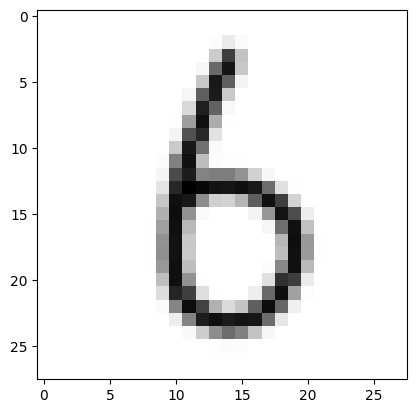

In [ ]:
print(np.argmax(predicciones[1]))
plt.imshow(x_test[1], cmap = plt.cm.binary)

## Guardamos nuestro modelo entrenado en el formato óptimo .h5

In [ ]:
modelo.save('numeros.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Comprobamos que se guardó bien en nuestro ordenador

In [ ]:
!dir

numeros.h5  sample_data  X.npy	Y.npy


## Instalamos la libreria Tensorflowjs para exportar nuestro modelo .h5 en un formato .json

In [ ]:
!pip3 install tensorflowjs

## Convertimos nuestro modelo en formato .json y lo guardamos en nuestro directorio

In [ ]:
!tensorflowjs_converter --input_format keras numeros.h5 output

2024-06-24 00:29:21.581894: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-24 00:29:23.910687: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Comprobamos que se realizó con éxito nuestra conversión y tenemos todos los archivos necesarios para importar nuestro modelo a nuestro servidor local

In [ ]:
!dir output

group1-shard1of1.bin  model.json
